# Decision tree

In [9]:
from sklearn import tree

In [10]:
from sklearn.tree import export_graphviz

In [11]:
import graphviz

## Visualize the Decision Boundary

In [12]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [13]:
def gini(p):
    return 2*(p)*(1-p)
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
    return 1 - np.max([p,1-p])

## Modelling End-to-End with Decision Tree

In [14]:
from sklearn.datasets import make_moons

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.metrics import accuracy_score

## Project HR

Download sample HR data from https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/ WA_Fn-UseC_-HR-Employee-Attrition.xlsx and save as csv.


In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("../WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.shape

(1470, 35)

In [20]:
df.pop('EmployeeCount')
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')

0       80
1       80
2       80
3       80
4       80
5       80
6       80
7       80
8       80
9       80
10      80
11      80
12      80
13      80
14      80
15      80
16      80
17      80
18      80
19      80
20      80
21      80
22      80
23      80
24      80
25      80
26      80
27      80
28      80
29      80
        ..
1440    80
1441    80
1442    80
1443    80
1444    80
1445    80
1446    80
1447    80
1448    80
1449    80
1450    80
1451    80
1452    80
1453    80
1454    80
1455    80
1456    80
1457    80
1458    80
1459    80
1460    80
1461    80
1462    80
1463    80
1464    80
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
y=df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [23]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()


In [25]:
y=le.fit_transform(y)

In [26]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [27]:
y.shape

(1470, 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [29]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [30]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'],prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'],prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'],prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'],prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'],prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'],prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'],prefix='OverTime')

In [31]:
df1 =pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, ind_JobRole,
                ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])]
               , axis=1)

In [32]:
df1

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,...,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,...,3,4,1,6,3,3,2,2,2,2
5,0,1,0,0,1,0,0,1,0,0,...,3,3,0,8,2,2,7,7,3,6
6,0,0,1,0,1,0,0,0,0,1,...,4,1,3,12,3,2,1,0,0,0
7,0,0,1,0,1,0,0,1,0,0,...,4,2,1,1,2,3,1,0,0,0
8,0,1,0,0,1,0,0,1,0,0,...,4,2,0,10,2,3,9,7,1,8
9,0,0,1,0,1,0,0,0,0,1,...,3,2,2,17,3,2,7,7,7,7


In [33]:
df1.shape

(1470, 51)

### Decision Tree

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df1,y)

In [37]:
dtc = tree.DecisionTreeClassifier(random_state=42)

In [38]:
dtc = dtc.fit(X_train, y_train)

In [39]:
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_train,dtc.predict(X_train))

In [ ]:
print(classification_report(y_train,dtc.predict(X_train)))

In [ ]:
confusion_matrix(y_train,dtc.predict(X_train))

In [ ]:
print(classification_report(y_test,dtc.predict(X_test)))

In [ ]:
confusion_matrix(y_test,dtc.predict(X_test))

In [40]:
def print_training_score(clf, X, y):
    print("Training Result:\n")
    print("Accuracy: {0:.4f}\n".format(accuracy_score(y, clf.predict(X))))
    print("Classification Report: \n {} \n".format(classification_report(y, clf.predict(X))))
    print("Confusion Matrix: \n {} \n".format(confusion_matrix(y, clf.predict(X))))

    res = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [41]:
def print_test_score(clf, X, y):
    print("Test Result:\n")

    print("Accuracy: {0:.4f}\n".format(accuracy_score(y, clf.predict(X))))
    print("Classification Report: \n {} \n".format(classification_report(y, clf.predict(X))))
    print("Confusion Matrix: \n {} \n".format(confusion_matrix(y, clf.predict(X))))

In [46]:
print_training_score(dtc, X_train, y_train)

Training Result:

Accuracy: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix: 
 [[930   0]
 [  0 172]] 

Average Accuracy: 	 0.7904
Accuracy SD: 		 0.0337


In [47]:
print_test_score(dtc, X_test, y_test)

Test Result:

Accuracy: 0.7745

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       303
           1       0.36      0.35      0.36        65

   micro avg       0.77      0.77      0.77       368
   macro avg       0.61      0.61      0.61       368
weighted avg       0.77      0.77      0.77       368
 

Confusion Matrix: 
 [[262  41]
 [ 42  23]] 



## Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bag_clf = BaggingClassifier(base_estimator=dtc, n_estimators=5000, bootstrap=True, n_jobs=-1, random_state=42)

In [51]:
bag_clf.fit(X_train, y_train)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [52]:
print_training_score(bag_clf, X_train, y_train)
print_test_score(bag_clf, X_test, y_test)

Training Result:

Accuracy: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix: 
 [[930   0]
 [  0 172]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Average Accuracy: 	 0.8621
Accuracy SD: 		 0.0123


Test Result:

Accuracy: 0.8560

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       303
           1       0.80      0.25      0.38        65

   micro avg       0.86      0.86      0.86       368
   macro avg       0.83      0.62      0.65       368
weighted avg       0.85      0.86      0.82       368
 

Confusion Matrix: 
 [[299   4]
 [ 49  16]] 



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_clf = RandomForestClassifier()

In [63]:
rf_clf.fit(X_train, y_train)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
print_training_score(rf_clf, X_train, y_train)
print_test_score(rf_clf, X_test, y_test)

Training Result:

Accuracy: 0.9864

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       930
           1       1.00      0.91      0.95       172

   micro avg       0.99      0.99      0.99      1102
   macro avg       0.99      0.96      0.97      1102
weighted avg       0.99      0.99      0.99      1102
 

Confusion Matrix: 
 [[930   0]
 [ 15 157]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataCon

Average Accuracy: 	 0.8566
Accuracy SD: 		 0.0149
Test Result:

Accuracy: 0.8478

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       303
           1       0.91      0.15      0.26        65

   micro avg       0.85      0.85      0.85       368
   macro avg       0.88      0.58      0.59       368
weighted avg       0.86      0.85      0.80       368
 

Confusion Matrix: 
 [[302   1]
 [ 55  10]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [65]:
import seaborn as sns

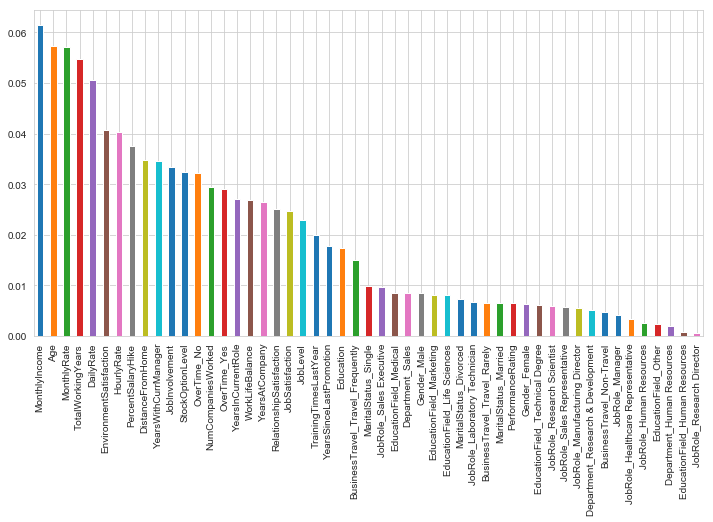

In [68]:
pd.Series(rf_clf.feature_importances_,
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Ada Boost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ada_clf = AdaBoostClassifier()

In [73]:
ada_clf.fit(X_train, y_train)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [74]:
print_training_score(ada_clf, X_train, y_train)
print_test_score(ada_clf, X_test, y_test)

Training Result:

Accuracy: 0.9020

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       930
           1       0.81      0.48      0.61       172

   micro avg       0.90      0.90      0.90      1102
   macro avg       0.86      0.73      0.77      1102
weighted avg       0.90      0.90      0.89      1102
 

Confusion Matrix: 
 [[911  19]
 [ 89  83]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Average Accuracy: 	 0.8666
Accuracy SD: 		 0.0233
Test Result:

Accuracy: 0.8641

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       303
           1       0.73      0.37      0.49        65

   micro avg       0.86      0.86      0.86       368
   macro avg       0.80      0.67      0.71       368
weighted avg       0.85      0.86      0.85       368
 

Confusion Matrix: 
 [[294   9]
 [ 41  24]] 



# Ada + RandomForest

In [75]:
arf_clf = AdaBoostClassifier(RandomForestClassifier())

In [79]:
arf_clf.fit(X_train, y_train)
print_training_score(arf_clf, X_train, y_train)
print_test_score(arf_clf, X_test, y_test)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

Training Result:

Accuracy: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix: 
 [[930   0]
 [  0 172]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/si

Average Accuracy: 	 0.8466
Accuracy SD: 		 0.0209
Test Result:

Accuracy: 0.8478

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       303
           1       0.85      0.17      0.28        65

   micro avg       0.85      0.85      0.85       368
   macro avg       0.85      0.58      0.60       368
weighted avg       0.85      0.85      0.80       368
 

Confusion Matrix: 
 [[301   2]
 [ 54  11]] 



## Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)
print_training_score(gbc_clf, X_train, y_train)
print_test_score(gbc_clf, X_test, y_test)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Result:

Accuracy: 0.9564

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       930
           1       0.99      0.73      0.84       172

   micro avg       0.96      0.96      0.96      1102
   macro avg       0.97      0.86      0.91      1102
weighted avg       0.96      0.96      0.95      1102
 

Confusion Matrix: 
 [[929   1]
 [ 47 125]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Average Accuracy: 	 0.8630
Accuracy SD: 		 0.0183
Test Result:

Accuracy: 0.8587

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       303
           1       0.78      0.28      0.41        65

   micro avg       0.86      0.86      0.86       368
   macro avg       0.82      0.63      0.66       368
weighted avg       0.85      0.86      0.83       368
 

Confusion Matrix: 
 [[298   5]
 [ 47  18]] 



# XGBoost

In [82]:
import xgboost as xgb

In [83]:
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train, y_train)
print_training_score(xg_clf, X_train, y_train)
print_test_score(xg_clf, X_test, y_test)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Result:

Accuracy: 0.9492

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       930
           1       0.98      0.69      0.81       172

   micro avg       0.95      0.95      0.95      1102
   macro avg       0.96      0.84      0.89      1102
weighted avg       0.95      0.95      0.95      1102
 

Confusion Matrix: 
 [[928   2]
 [ 54 118]] 



/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Average Accuracy: 	 0.8639
Accuracy SD: 		 0.0186
Test Result:

Accuracy: 0.8587

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       303
           1       0.78      0.28      0.41        65

   micro avg       0.86      0.86      0.86       368
   macro avg       0.82      0.63      0.66       368
weighted avg       0.85      0.86      0.83       368
 

Confusion Matrix: 
 [[298   5]
 [ 47  18]] 

